In [1]:
from simphony.libraries import siepic
from simphony.die import Die
from phidl import quickplot

gcinput model defined device

gcinput model defined device ref

ysplit model defined device

ysplit model defined device ref

wglong model defined device

wglong model defined device ref

wgshort model defined device

wgshort model defined device ref

yrecombiner model defined device

yrecombiner model defined device ref

gcoutput model defined device

gcoutput model defined device ref



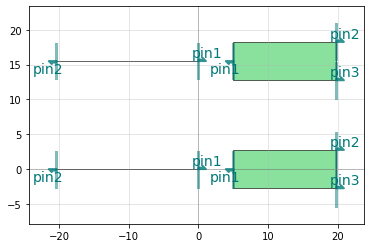

In [2]:
gc_input = siepic.GratingCoupler(name="gcinput")
y_splitter = siepic.YBranch(name="ysplit")
wg_long = siepic.Waveguide(length=150e-6, name="wglong")
wg_short = siepic.Waveguide(length=50e-6, name="wgshort")
y_recombiner = siepic.YBranch(name="yrecombiner")
gc_output = siepic.GratingCoupler(name="gcoutput")
die = Die(name="die1")
die.add_components([gc_input, y_splitter, wg_long, gc_output, y_recombiner, wg_short])
die.distribute_devices(direction='grid', shape=(3,2))
die.visualize()

In [3]:
# next we connect the components to each other
# you can connect pins directly:
y_splitter["pin1"].connect(gc_input["pin1"])

# or connect components with components:
# (when using components to make connections, their first unconnected pin will
# be used to make the connection.)
y_splitter.connect(wg_long)

# or any combination of the two:
y_splitter["pin3"].connect(wg_short)
# y_splitter.connect(wg_short["pin1"])

# when making multiple connections, it is often simpler to use `multiconnect`
# multiconnect accepts components, pins, and None
# if None is passed in, the corresponding pin is skipped
y_recombiner.multiconnect(gc_output, wg_short, wg_long)

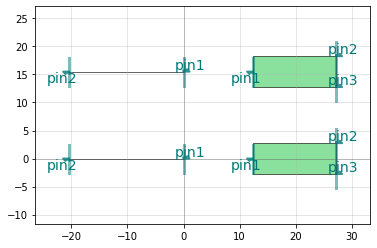

Device (name "die1" (uid 17), ports [], aliases [], 0 polygons, 2 references)

In [4]:
die.visualize()
die

In [5]:
die.device.references

[DeviceReference (parent Device "gcinput", ports ['pin1', 'pin2'], origin [ 0.  15.5], rotation 0, x_reflection False),
 DeviceReference (parent Device "ysplit", ports ['pin1', 'pin2', 'pin3'], origin [19.8 15.5], rotation 0, x_reflection False),
 DeviceReference (parent Device "wglong", ports [], origin [24.8 15.5], rotation 0, x_reflection False),
 DeviceReference (parent Device "gcoutput", ports ['pin1', 'pin2'], origin [0. 0.], rotation 0, x_reflection False),
 DeviceReference (parent Device "yrecombiner", ports ['pin1', 'pin2', 'pin3'], origin [19.8  0. ], rotation 0, x_reflection False),
 DeviceReference (parent Device "wgshort", ports [], origin [24.8  0. ], rotation 0, x_reflection False)]

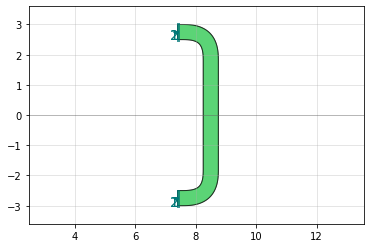

In [6]:
quickplot(die)

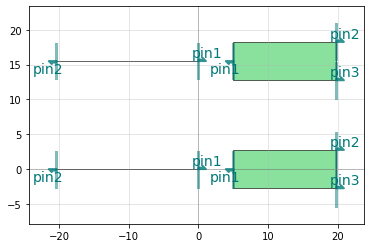

In [8]:
from phidl.geometry import grid
quickplot(grid([gc_input.device, y_splitter.device, gc_output.device, y_recombiner.device], shape=(2,2)))

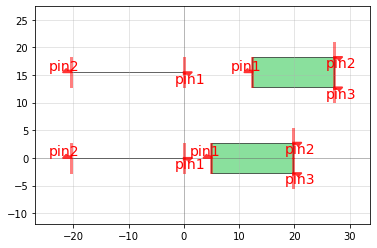

[]

In [30]:
from phidl import Device
device = Device()
device_grid = grid([gc_input.device, y_splitter.device, gc_output.device, y_recombiner.device], shape=(2,2))
device_grid_refs = device_grid.references
device_grid_refs[1].connect(device_grid_refs[1].parent.ports['pin1'], device_grid_refs[0].parent.ports['pin1'])
device_grid_refs[3].connect(device_grid_refs[3].parent.ports['pin1'], device_grid_refs[2].parent.ports['pin1'])
quickplot(device_grid_refs)
refs = []
refs2 = []
# refs = [device.add_ref(ref.parent) for ref in .references]
refs

In [20]:
refs2.append(refs[1].connect(y_splitter.device.ports['pin1'], gc_input.device.ports['pin1']))
refs2.append(refs[3].connect(y_recombiner.device.ports['pin1'], gc_output.device.ports['pin1']))

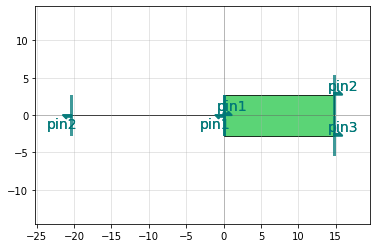

In [22]:
quickplot(device)